In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import string
import numpy as np
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kylejava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv("./spam.csv", encoding = "ISO-8859-1", engine = "python")

In [3]:
df = df[["v1","v2"]].copy()
df = df.rename(columns={"v1": "class", "v2":"sms"})
df

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


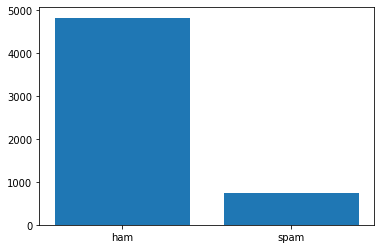

In [4]:
name_of_values= df["class"].unique().tolist()
num_of_values = []
num_of_values.append(df[df["class"] == "ham"].shape[0])
num_of_values.append(df[df["class"] == "spam"].shape[0])

plt.bar(name_of_values, num_of_values)
plt.show()

In [5]:
def preprocess(sentence):
    sentence = (sentence.translate(str.maketrans('', '',string.punctuation)))
    sentence=word_tokenize(sentence)
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(sent) for sent in sentence]
    stop_words = set(stopwords.words("english"))
    sentence = [sent for sent in sentence if sent not in stop_words]
    return ' '.join(sentence)
    

In [6]:
df["sms"]=df["sms"].apply(lambda sentence:preprocess(sentence))
df["sms"]=df["sms"].apply(lambda sentence: sentence.lower())


In [7]:
df

,class,sms
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah i dont think go usf life around though
...,...,...
5567,spam,this 2nd time tried 2 contact u u å£750 pound ...
5568,ham,will ì b going esplanade fr home
5569,ham,pity wa mood soany suggestion
5570,ham,the guy bitching i acted like id interested bu...


In [8]:
sms_values = df["sms"].tolist()
class_values = df["class"].tolist()
x_train, x_test, y_train, y_test = train_test_split(sms_values, class_values, test_size=0.80)
cv = CountVectorizer()
x = cv.fit_transform(x_train)


In [9]:
SVM = svm.SVC()
SVM.fit(x,y_train)


SVC()

In [10]:
x_test = cv.transform(x_test)
print("Accuracy: " + str(SVM.score(x_test, y_test)))


Accuracy: 0.9504262000897263
